In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn import svm
import sklearn.model_selection as model_selection
from PIL import Image

from sklearn.metrics import precision_score,confusion_matrix

In [2]:
def load_images_data(folder):
    images = []
    for filename in os.listdir(folder):
        im = folder+"/"+filename
        fin = Image.open(im).convert('L')
        fin = fin.resize((25,30))
        fin.save(im)
        img = imread(im,as_gray=True)
        im_1d = np.reshape(img, (img.shape[0]*img.shape[1]))
        images.append(im_1d)
    return images


In [3]:
test_live = load_images_data('C:/Users/vatsa/Downloads/Assignment_data/test_live/')
test_spoof = load_images_data('C:/Users/vatsa/Downloads/Assignment_data/test_spoof')
train_live = load_images_data('C:/Users/vatsa/Downloads/Assignment_data/train_live')
train_spoof = load_images_data('C:/Users/vatsa/Downloads/Assignment_data/train_spoof')

In [4]:
X_train = pd.DataFrame(train_live)
X_train['target'] = 0
Y_train=pd.DataFrame(train_spoof)
Y_train['target'] = 1
X_test=pd.DataFrame(test_live)
X_test['target'] = 0
Y_test=pd.DataFrame(test_spoof)
Y_test['target'] = 1

In [5]:
train = pd.concat([X_train,Y_train])

In [6]:
test = pd.concat([X_test,Y_test])

In [7]:
train = train.sample(frac=1)
print(train)


      0   1   2   3    4    5    6    7    8    9  ...  741  742  743  744  \
182  86  89  92  97  100  102  103  105  106  107  ...  103  102  105  109   
204  80  82  85  89   92   94   95   97   98   99  ...  140  145  148  152   
200  80  82  85  89   93   94   95   96   98   99  ...  124  128  129  120   
19   81  83  85  88   92   94   95   97   98   99  ...  127  122  113  115   
156  81  83  84  87   91   94   96   98   99  100  ...  180  179  176  172   
..   ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
127  81  84  85  87   91   95   96   98   99  100  ...  185  183  180  175   
108  81  83  86  89   92   94   95   96   96   97  ...  174  172  172  170   
160  75  78  81  83   84   87   88   89   89   87  ...  146  138  126  125   
69   78  81  83  85   88   90   91   93   94   95  ...  173  171  168  163   
111  80  83  86  89   92   95   96   97   97   97  ...  177  176  174  171   

     745  746  747  748  749  target  
182  148  162  157  144 

In [8]:
test = test.sample(frac=1)
print(test)

      0   1   2   3   4   5   6    7    8    9  ...  741  742  743  744  745  \
80   76  78  83  90  92  94  95   96   97   98  ...  139  161  168  162  158   
115  73  74  75  76  79  82  82   82   81   81  ...  136  128  124  140  142   
56   77  78  81  85  89  91  92   93   95   96  ...  177  174  170  163  157   
16   79  81  84  87  90  92  93   95   97   98  ...  169  176  175  170  165   
123  72  74  79  86  88  90  91   92   93   94  ...  146  134  123  126  138   
..   ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
29   75  77  82  89  91  93  94   95   96   97  ...  126  115  118  142  161   
12   80  82  84  87  91  93  94   97   98   95  ...  168  177  178  173  168   
75   74  75  76  78  80  85  87   88   88   88  ...  152  147  144  142  141   
177  83  83  86  90  94  97  98  100  101  102  ...  170  173  176  178  172   
8    73  75  77  80  83  86  88   90   91   92  ...  170  168  166  160  155   

     746  747  748  749  target  
80   

In [12]:
target = []
for i in train.columns:
 target.append(i)

In [13]:
X_training_data = train.loc[:, target].values
Y_training_data = train.loc[:, ['target']].values
Y_training_data = np.ravel(Y_training_data)
# Initializing testing data for SVM Classification
X_testing_data = test.loc[:, target].values
Y_testing_data = test.loc[:, ['target']].values
Y_testing_data = np.ravel(Y_testing_data)

In [14]:
svm_lin_model = svm.SVC(kernel='linear', C=1).fit(X_training_data, Y_training_data)
y_predict = svm_lin_model.predict(X_testing_data)
y_predict

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [15]:
svm_lin_model.score(X_testing_data, Y_testing_data)

0.8175

In [16]:
precision_score(Y_testing_data,y_predict)


0.7822222222222223

In [17]:
confusion_matrix(Y_testing_data,y_predict)


array([[151,  49],
       [ 24, 176]], dtype=int64)

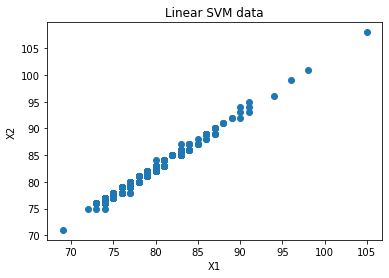

In [18]:
plt.scatter(X_training_data[:,0], X_training_data[:,1])
plt.title('Linear SVM data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
